In [340]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fbref-premier-league-202425-player-stats-dataset/fbref_PL_2024-25.csv


# **✅ Table of Contents**

------------------
✅ **Import libraries.**   
✅ **Data Import.**   
✅ **Data Transformation.**    
✅ **Data Visualization & Analysis.**   

# **Import Libraries.**

In [341]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import**

In [342]:
df = pd.read_csv('/kaggle/input/fbref-premier-league-202425-player-stats-dataset/fbref_PL_2024-25.csv', index_col = 0)

## **Data Description.**
📌 This dataset contains comprehensive player statistics for the 2024/25 Premier League season, scraped from FBref. It includes detailed performance metrics for approximately 500 players across all teams, making it a valuable resource for football analytics, machine learning models, and performance analysis

[Data Information & other notebooks click](https://www.kaggle.com/datasets/siddhrajthakor/fbref-premier-league-202425-player-stats-dataset)

In [343]:
df.head()

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
Rk,,,,,,,,,,,,,,,,,,,,,
1,Max Aarons,eng ENG,DF,Bournemouth,24.0,2000.0,3,1,86,1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Joshua Acheampong,eng ENG,DF,Chelsea,18.0,2006.0,4,2,170,1.9,...,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12
3,Tyler Adams,us USA,MF,Bournemouth,25.0,1999.0,28,21,1965,21.8,...,0.00,0.14,0.14,0.00,0.14,0.07,0.05,0.12,0.07,0.12
4,Tosin Adarabioyo,eng ENG,DF,Chelsea,26.0,1997.0,22,15,1409,15.7,...,0.06,0.06,0.13,0.06,0.13,0.06,0.01,0.07,0.06,0.07
5,Simon Adingra,ci CIV,"FW,MF",Brighton,22.0,2002.0,29,12,1097,12.2,...,0.16,0.16,0.33,0.16,0.33,0.20,0.20,0.40,0.20,0.40


## **Summary**

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 1 to 574
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      574 non-null    object 
 1   Nation      570 non-null    object 
 2   Pos         574 non-null    object 
 3   Squad       574 non-null    object 
 4   Age         570 non-null    float64
 5   Born        570 non-null    float64
 6   MP          574 non-null    int64  
 7   Starts      574 non-null    int64  
 8   Min         574 non-null    int64  
 9   90s         574 non-null    float64
 10  Gls         574 non-null    int64  
 11  Ast         574 non-null    int64  
 12  G+A         574 non-null    int64  
 13  G-PK        574 non-null    int64  
 14  PK          574 non-null    int64  
 15  PKatt       574 non-null    int64  
 16  CrdY        574 non-null    int64  
 17  CrdR        574 non-null    int64  
 18  xG          574 non-null    float64
 19  npxG        574 non-null    float6

In [345]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,570.0,25.098246,4.450568,15.0,22.0000,25.000,28.0000,39.00
Born,570.0,1998.526316,4.476477,1985.0,1996.0000,1999.000,2002.0000,2008.00
MP,574.0,20.151568,12.230609,1.0,9.0000,21.000,32.0000,38.00
Starts,574.0,14.564460,12.304536,0.0,3.0000,12.000,25.0000,38.00
Min,574.0,1308.240418,1053.645962,1.0,331.2500,1103.500,2204.0000,3420.00
90s,574.0,14.535366,11.707284,0.0,3.7000,12.250,24.5000,38.00
Gls,574.0,1.885017,3.537979,0.0,0.0000,0.000,2.0000,29.00
Ast,574.0,1.400697,2.253498,0.0,0.0000,0.000,2.0000,18.00
G+A,574.0,3.285714,5.218296,0.0,0.0000,1.000,4.0000,47.00
G-PK,574.0,1.764808,3.144360,0.0,0.0000,0.000,2.0000,20.00


In [346]:
df.describe(include='object').T

,count,unique,top,freq
Player,574,562,Reiss Nelson,2
Nation,570,65,eng ENG,194
Pos,574,10,DF,186
Squad,574,20,Southampton,36


## **Missing Value & Duplicate Value Check**

In [347]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,Player,0
1,Nation,4
2,Pos,0
3,Squad,0
4,Age,4
5,Born,4
6,MP,0
7,Starts,0
8,Min,0
9,90s,0


In [348]:
df.duplicated().sum()

0

# **2. Data Transformation.**

**The purpose of this analysis is to identify the best forward (FW). Therefore, only the data of players whose position is FW will be used.**

In [349]:
fw = df[(df['Pos'] == 'FW') | (df['Pos'] == 'FW,MF')]

In [350]:
fw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 5 to 573
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      145 non-null    object 
 1   Nation      143 non-null    object 
 2   Pos         145 non-null    object 
 3   Squad       145 non-null    object 
 4   Age         143 non-null    float64
 5   Born        143 non-null    float64
 6   MP          145 non-null    int64  
 7   Starts      145 non-null    int64  
 8   Min         145 non-null    int64  
 9   90s         145 non-null    float64
 10  Gls         145 non-null    int64  
 11  Ast         145 non-null    int64  
 12  G+A         145 non-null    int64  
 13  G-PK        145 non-null    int64  
 14  PK          145 non-null    int64  
 15  PKatt       145 non-null    int64  
 16  CrdY        145 non-null    int64  
 17  CrdR        145 non-null    int64  
 18  xG          145 non-null    float64
 19  npxG        145 non-null    float6

In [351]:
fw.drop(columns = ['Nation' , 'Born' , 'Age'], inplace = True, axis = 1)

In [352]:
fw.describe(include='object').T

,count,unique,top,freq
Player,145,141,Reiss Nelson,2
Pos,145,2,FW,85
Squad,145,20,Leicester City,12


In [353]:
# Two Squad Player Check

fw['Player'].value_counts() > 1

Player
Reiss Nelson              True
Marcus Rashford           True
Evan Ferguson             True
Jordan Ayew               True
Simon Adingra            False
                         ...  
Cody Gakpo               False
Niclas Füllkrug          False
João Félix               False
Abdul Fatawu Issahaku    False
Joshua Zirkzee           False
Name: count, Length: 141, dtype: bool

In [354]:
fw[fw['Player'].duplicated(keep=False)]

,Player,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
Rk,,,,,,,,,,,,,,,,,,,,,
41,Jordan Ayew,"FW,MF",Crystal Palace,1,0,21,0.2,0,0,0,...,0.00,0.00,0.00,0.00,0.00,1.96,0.21,2.17,1.96,2.17
42,Jordan Ayew,"FW,MF",Leicester City,30,19,1638,18.2,5,0,5,...,0.27,0.00,0.27,0.22,0.22,0.17,0.06,0.24,0.13,0.19
179,Evan Ferguson,FW,West Ham,8,1,156,1.7,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.32,0.17,0.50,0.32,0.50
180,Evan Ferguson,FW,Brighton,13,2,246,2.7,1,0,1,...,0.37,0.00,0.37,0.37,0.37,0.20,0.15,0.35,0.20,0.35
379,Reiss Nelson,FW,Arsenal,1,0,3,0.0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
380,Reiss Nelson,FW,Fulham,11,5,487,5.4,1,1,2,...,0.18,0.18,0.37,0.18,0.37,0.20,0.18,0.39,0.20,0.39
428,Marcus Rashford,"FW,MF",Manchester Utd,15,12,978,10.9,4,1,5,...,0.37,0.09,0.46,0.37,0.46,0.16,0.19,0.35,0.16,0.35
429,Marcus Rashford,FW,Aston Villa,10,4,444,4.9,2,2,4,...,0.41,0.41,0.81,0.20,0.61,0.62,0.46,1.08,0.46,0.92


In [355]:
fw.columns

Index(['Player', 'Pos', 'Squad', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast',
       'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1',
       'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')

In [356]:
rename_map = {
    'Gls.1': 'Gls_per90',
    'Ast.1': 'Ast_per90',
    'G+A.1': 'GplusA_per90',
    'G-PK.1': 'NonPenGls_per90',
    'G+A-PK': 'GplusAminusPK_per90',
    'xG.1': 'xG_per90',
    'xAG.1': 'xAG_per90',
    'xG+xAG.1': 'xGplusxAG_per90',
    'npxG.1': 'npxG_per90',
    'npxG+xAG.1': 'npxGplusxAG_per90'
}

fw = fw.rename(columns=rename_map)


In [357]:
# Two Squad Plyaer data transformation

per90_cols = [c for c in fw.columns if c.lower().endswith(" per90")]

numeric_cols = fw.select_dtypes(include=[np.number]).columns.tolist()
sum_cols = [c for c in numeric_cols if c not in per90_cols]

In [358]:
clubs = (
    fw.groupby(['Player'])['Squad']
      .apply(lambda s: ' / '.join(sorted(set(map(str, s)))))
      .reset_index()
      .rename(columns={'Squad': 'Clubs'})
)

summed = (
    fw.groupby('Player')[sum_cols]
      .sum(min_count=1)
      .reset_index()
)

fw_data = summed.merge(clubs, on='Player', how='left')
front = ['Player'] + ['Clubs']
fw_data = fw_data[front + [c for c in fw_data.columns if c not in front]]

In [359]:
fw_data[fw_data['Player'] == 'Jordan Ayew']

,Player,Clubs,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,...,Gls_per90,Ast_per90,GplusA_per90,NonPenGls_per90,GplusAminusPK_per90,xG_per90,xAG_per90,xG+xAG,npxG_per90,npxGplusxAG_per90
71,Jordan Ayew,Crystal Palace / Leicester City,31,19,1659,18.4,5,0,5,4,...,0.27,0.0,0.27,0.22,0.22,2.13,0.27,2.41,2.09,2.36


In [360]:
fw_data = fw_data.drop(columns=[c for c in fw_data.columns if c.endswith('_per90')])

In [361]:
fw_data.columns

Index(['Player', 'Clubs', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A',
       'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG',
       'PrgC', 'PrgP', 'PrgR', 'xG+xAG'],
      dtype='object')

In [362]:
# Feature Engineering
den = np.where(fw_data['Min'] > 0, fw_data['Min'] / 90.0, np.nan)

fw_data['Gls_per90']              = fw_data['Gls'] / den    # Goals per 90
fw_data['Ast_per90']              = fw_data['Ast'] / den    # Assists per 90
fw_data['GplusA_per90']           = fw_data['G+A'] / den    # Goal+Assist per 90
fw_data['NonPenGls_per90']        = fw_data['G-PK'] / den   # Non-Penalty Goals per 90

fw_data['GplusAminusPK'] = fw_data['G+A'] - fw_data['PK']

fw_data['GplusAminusPK_per90']    = fw_data['GplusAminusPK'] / den # Non-Penalty G+A per 90
fw_data['xG_per90']               = fw_data['xG'] / den     # xG per 90
fw_data['xAG_per90']              = fw_data['xAG'] / den    # xAG per 90
fw_data['xGplusxAG_per90']        = fw_data['xG+xAG'] / den # xG+xAG per 90
fw_data['npxG_per90']             = fw_data['npxG'] / den   # Non-Penalty xG per 90
fw_data['npxGplusxAG_per90']      = fw_data['npxG+xAG'] / den

per90_cols = [c for c in fw_data.columns if c.endswith('_per90')]
fw_data[per90_cols] = fw_data[per90_cols].round(3)

In [363]:
fw_data.head()

,Player,Clubs,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,...,Ast_per90,GplusA_per90,NonPenGls_per90,GplusAminusPK,GplusAminusPK_per90,xG_per90,xAG_per90,xGplusxAG_per90,npxG_per90,npxGplusxAG_per90
0,Abdul Fatawu Issahaku,Leicester City,11,6,579,6.4,0,2,2,0,...,0.311,0.311,0.000,2,0.311,0.062,0.249,0.048,0.062,0.311
1,Adam Armstrong,Southampton,20,15,1248,13.9,2,2,4,2,...,0.144,0.288,0.144,4,0.288,0.238,0.087,0.023,0.166,0.252
2,Adama Traoré,Fulham,36,18,1772,19.7,2,7,9,2,...,0.356,0.457,0.102,9,0.457,0.203,0.249,0.023,0.203,0.452
3,Albert Grønbaek,Southampton,4,2,143,1.6,0,0,0,0,...,0.000,0.000,0.000,0,0.000,0.063,0.000,0.050,0.063,0.063
4,Alex Iwobi,Fulham,38,35,2981,33.1,9,6,15,9,...,0.181,0.453,0.272,15,0.453,0.142,0.211,0.011,0.142,0.356


In [364]:
num_cols = fw_data.select_dtypes(include = ['int64','float64']).columns

In [365]:
print(num_cols,'\n')
print('length = ',len(num_cols))

Index(['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'xG+xAG', 'Gls_per90', 'Ast_per90', 'GplusA_per90',
       'NonPenGls_per90', 'GplusAminusPK', 'GplusAminusPK_per90', 'xG_per90',
       'xAG_per90', 'xGplusxAG_per90', 'npxG_per90', 'npxGplusxAG_per90'],
      dtype='object') 

length =  31


# **3. Data Visualization & Analysis**

## **Histogram**

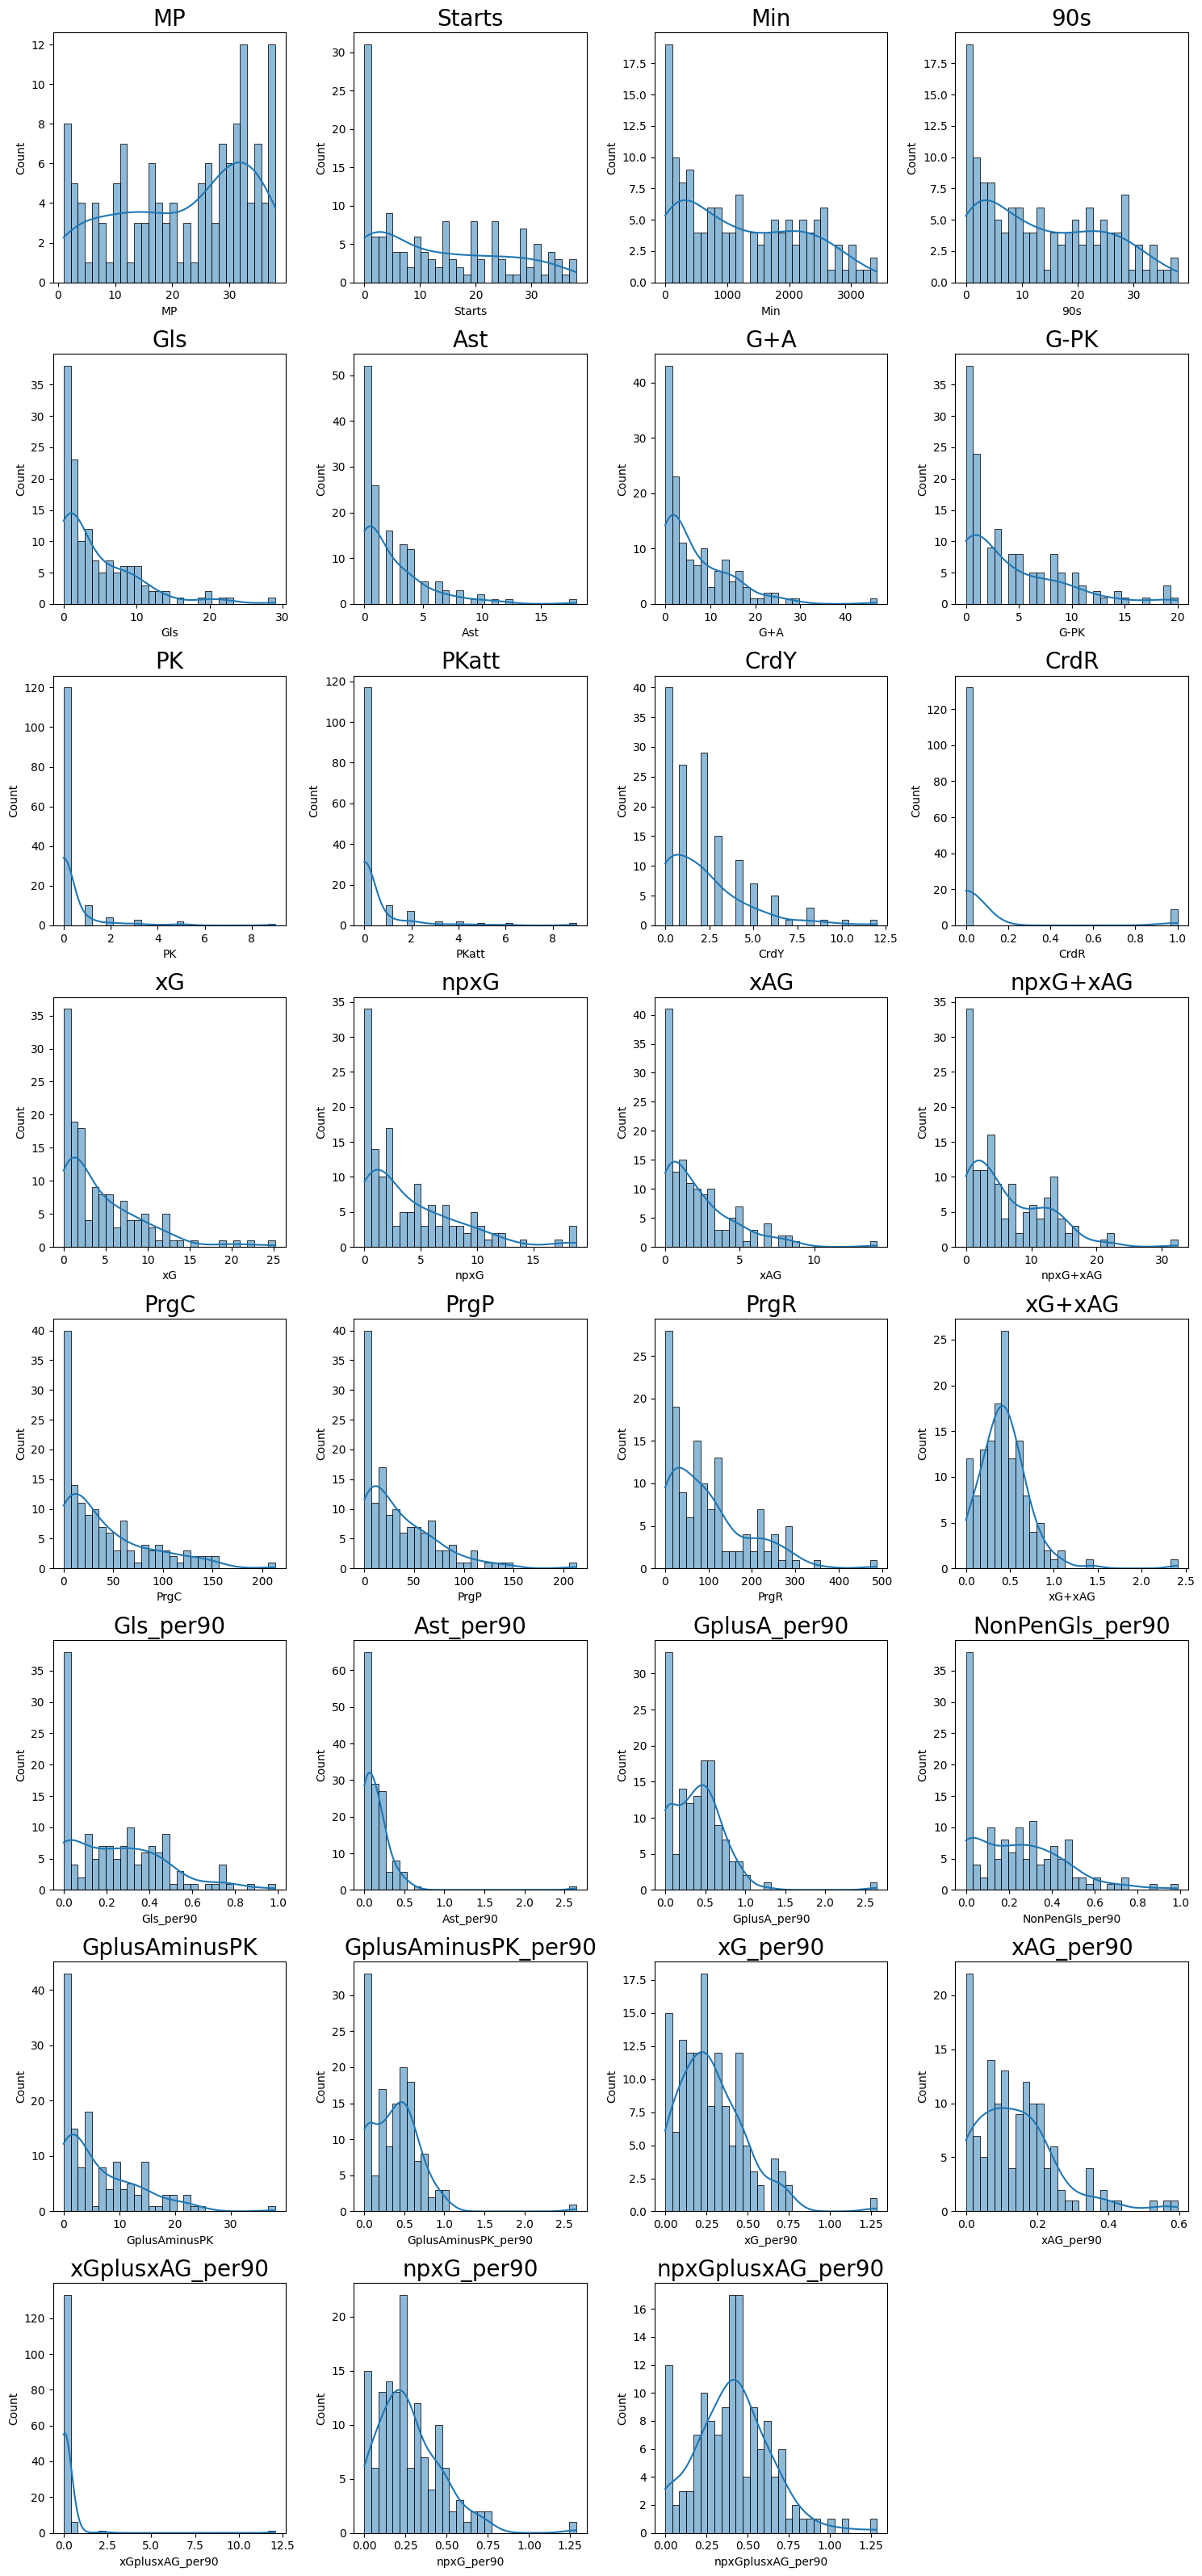

In [366]:
num_rows = (len(num_cols) + 1) // 2

f, ax = plt.subplots(8,4, figsize=(15,2 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = fw_data, x= cols, ax = ax[index],kde=True, bins=30)
    ax[index].set_title(cols, size = 20)

for j in range(len(num_cols), len(ax)):
    f.delaxes(ax[j])
plt.tight_layout()
plt.show()

## **Goals vs Assists per 90 (Forwards)**

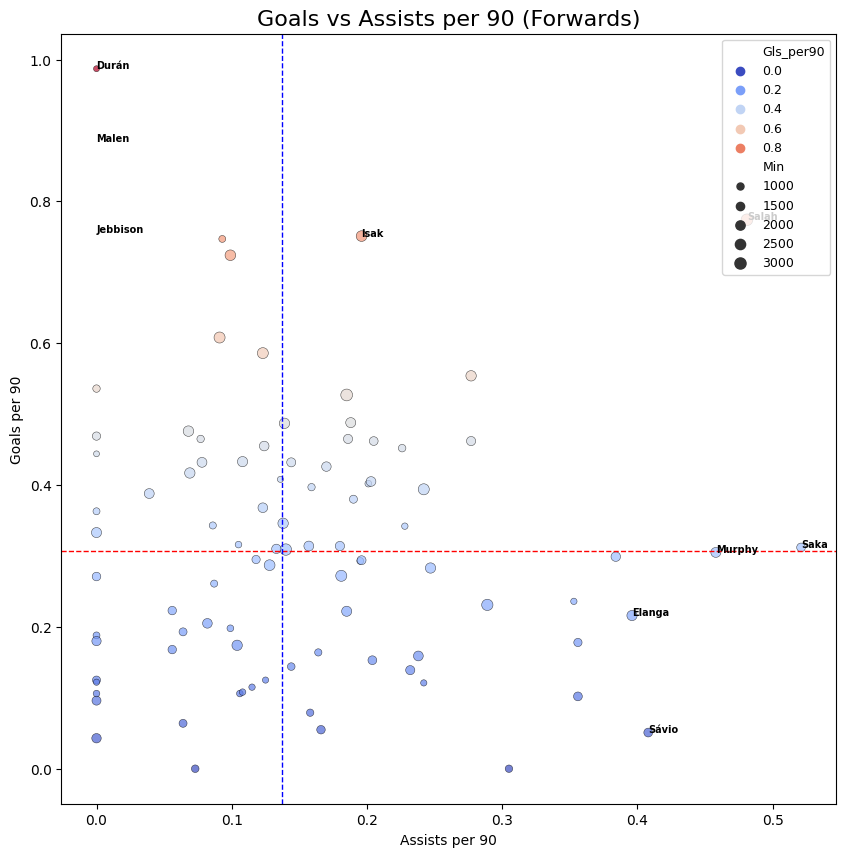

In [367]:
MIN_MIN = 600  
fw_eff = fw_data[fw_data['Min'] >= MIN_MIN]

plt.figure(figsize=(10,10))
sns.scatterplot(
    data=fw_eff,
    x="Ast_per90", 
    y="Gls_per90",
    size="Min",       
    hue="Gls_per90",   
    palette="coolwarm",
    alpha=0.7,
    edgecolor="k"
)

plt.axhline(fw_eff['Gls_per90'].median(), color="red", ls="--", lw=1)
plt.axvline(fw_eff['Ast_per90'].median(), color="blue", ls="--", lw=1)

plt.title("Goals vs Assists per 90 (Forwards)", fontsize=16)
plt.xlabel("Assists per 90")
plt.ylabel("Goals per 90")

top_scorers = fw_data.nlargest(5, "Gls_per90")
top_assisters = fw_eff.nlargest(5, "Ast_per90")
label_targets = pd.concat([top_scorers, top_assisters]).drop_duplicates()

for _, row in label_targets.iterrows():
    last_name = row["Player"].split()[-1]  # Last Name
    plt.text(
        row["Ast_per90"], 
        row["Gls_per90"], 
        last_name,
        fontsize=7, weight="bold", color="black"
    )


plt.legend(loc="upper right", fontsize=9)
plt.show()

**This scatter plot visualizes forwards’ goal contribution (Gls_per90) and assist contribution (Ast_per90) simultaneously.**   

The four quadrants can be interpreted as:

**Top-right**: Balanced star players with both high goal and assist contributions.   
 
**Top-left**: Classic strikers focused mainly on scoring.   

**Bottom-right**: Playmaker-type forwards contributing mainly through assists.   

**Bottom-left**: Players with relatively low overall attacking output.   

Thus, this scatter plot is less about identifying individual names directly, and more about understanding the overall distribution of forwards into scoring-oriented, assist-oriented, and balanced profiles.

## **Top10 Goals Player & Top10 Goals_per 90 Player**

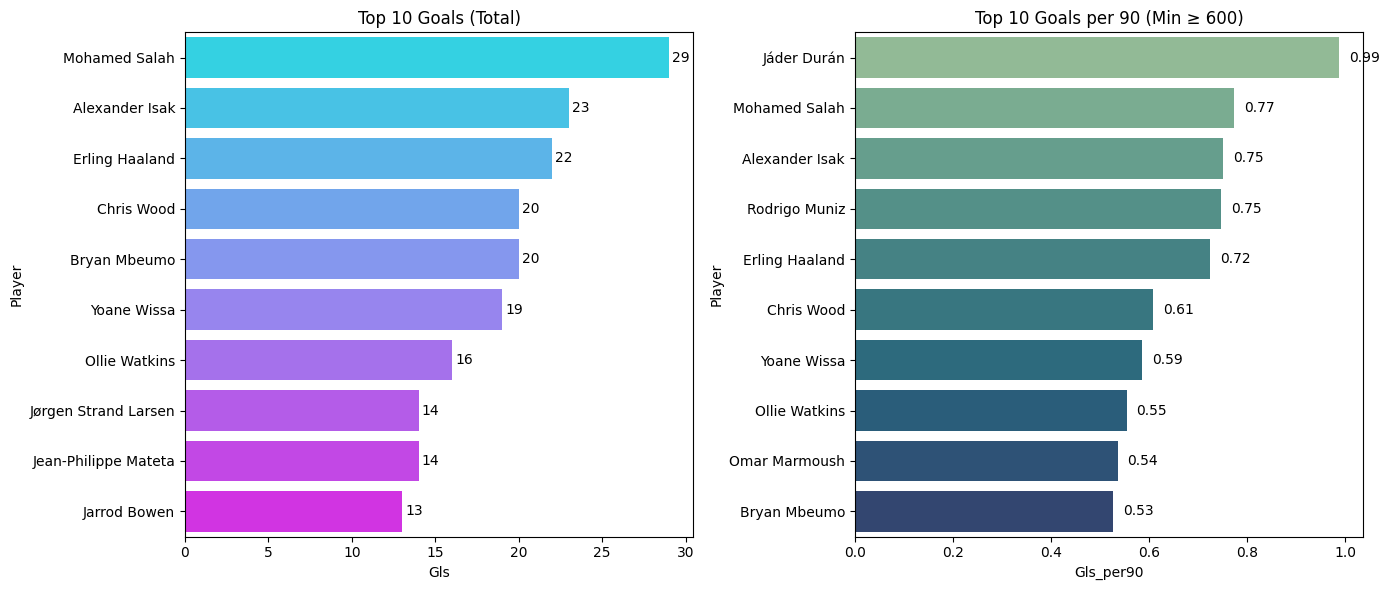

In [368]:
MIN_MIN = 600  
fw_eff = fw_data[fw_data['Min'] >= MIN_MIN]

# left : Top10 Goals Score player 
left = fw_data.sort_values('Gls', ascending=False).head(10).loc[:, ['Player','Gls']]

# right : Top10 Goals_per90 player
right = (fw_eff
         .dropna(subset=['Gls_per90'])
         .sort_values('Gls_per90', ascending=False)
         .head(10)
         .loc[:, ['Player','Gls_per90']])

fig, axes = plt.subplots(1, 2, figsize=(14,6))

ax = sns.barplot(data=left, x='Gls', y='Player', palette='cool', ax=axes[0])
axes[0].set_title('Top 10 Goals (Total)')
for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w+0.2, y, f'{int(w)}', va='center')

ax2 = sns.barplot(data=right, x='Gls_per90', y='Player', palette='crest', ax=axes[1])
axes[1].set_title(f'Top 10 Goals per 90 (Min ≥ {MIN_MIN})')
for p in ax2.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax2.text(w+0.02, y, f'{w:.2f}', va='center')

plt.tight_layout()
plt.show()


## **Top10 Assist Player & Top10 Assist_per 90 Player**

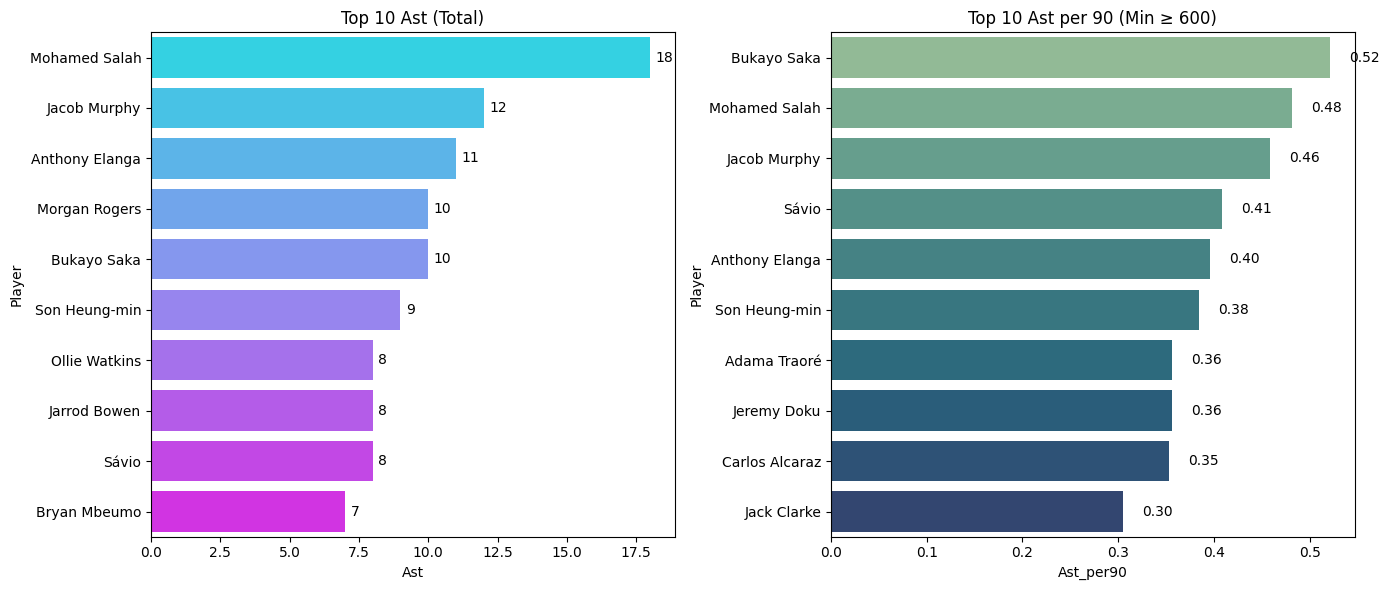

In [369]:
# left : Top10 Ast Score player 
left = fw_data.sort_values('Ast', ascending=False).head(10).loc[:, ['Player','Ast']]

# right : Top10 Ast_per90 player
right = (fw_eff
         .dropna(subset=['Ast_per90'])
         .sort_values('Ast_per90', ascending=False)
         .head(10)
         .loc[:, ['Player','Ast_per90']])

fig, axes = plt.subplots(1, 2, figsize=(14,6))

ax = sns.barplot(data=left, x='Ast', y='Player', palette='cool', ax=axes[0])
axes[0].set_title('Top 10 Ast (Total)')
for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w+0.2, y, f'{int(w)}', va='center')

ax2 = sns.barplot(data=right, x='Ast_per90', y='Player', palette='crest', ax=axes[1])
axes[1].set_title(f'Top 10 Ast per 90 (Min ≥ {MIN_MIN})')
for p in ax2.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax2.text(w+0.02, y, f'{w:.2f}', va='center')

plt.tight_layout()
plt.show()

## **Finish efficiency**

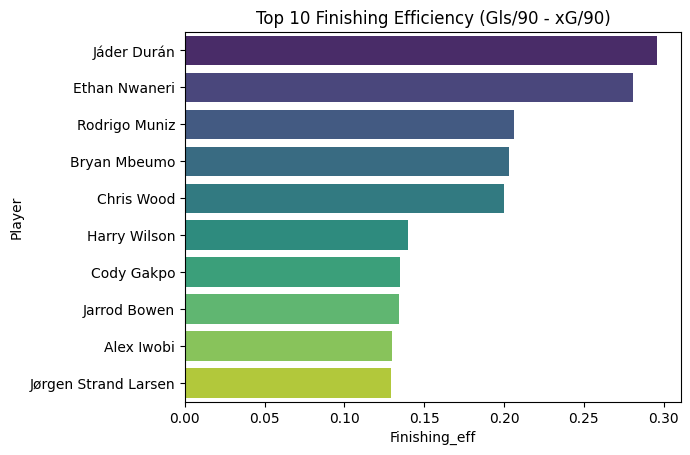

In [370]:
fw_eff['Finishing_eff'] = fw_eff['Gls_per90'] - fw_eff['xG_per90']
sns.barplot(data=(fw_eff.sort_values('Finishing_eff', ascending=False).head(10)),
            x='Finishing_eff', y='Player', palette='viridis')
plt.title('Top 10 Finishing Efficiency (Gls/90 - xG/90)')
plt.show()

**Finishing Efficiency = Goals per 90 – xG per 90**
* A positive value means the player scored more goals than expected (overperforming xG).
* A negative value means the player scored fewer goals than expected (underperforming xG).

## **🏅Who is the Best Forward?**

In [371]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### **Creative Evaluation score**

In [372]:
features = ['Gls_per90','Ast_per90','GplusA_per90',
            'NonPenGls_per90','xG_per90','xAG_per90','npxG_per90']

In [373]:
# To ensure fair comparison, only players with at least 900 minutes played were considered.

MIN_MIN = 900 
fw_data = fw_data[fw_data['Min'] >= MIN_MIN].dropna(subset=features).copy()

In [374]:
X = fw_data[features].dropna()

# 2) 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [375]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [376]:
#pc1 

loadings = pd.Series(pca.components_[0], index=features)

print("PC1 explained variance ratio:", pca.explained_variance_ratio_[0])
print("PC1 loadings (weights):")
print(loadings)

PC1 explained variance ratio: 0.598235582512965
PC1 loadings (weights):
Gls_per90          0.466708
Ast_per90          0.059981
GplusA_per90       0.416324
NonPenGls_per90    0.460091
xG_per90           0.451442
xAG_per90         -0.008822
npxG_per90         0.435545
dtype: float64


* **PC1 primarily reflects scoring ability (goals, non-penalty goals, xG-related stats),while assist-related contributions play a smaller role.**
* **In other words, PC1 can be seen as a measure of “goal-scoring productivity.”**

In [377]:
scores = pca.transform(X_scaled)[:,0]   
fw_data['Attack_Score_pc1'] = scores

In [378]:
top10_attackers = fw_data.sort_values('Attack_Score_pc1', ascending=False).head(10)
print(top10_attackers[['Player','Attack_Score_pc1']])

              Player  Attack_Score_pc1
96     Mohamed Salah          5.178206
42    Erling Haaland          4.884407
5     Alexander Isak          4.864042
118    Rodrigo Muniz          4.533765
137      Yoane Wissa          3.579875
105    Ollie Watkins          3.097036
35        Diogo Jota          2.969213
86         Luis Díaz          2.243926
23        Chris Wood          2.162514
102  Nicolas Jackson          1.967266


### **Top 10 Forwards by PC1 (Overall Attack Score)**

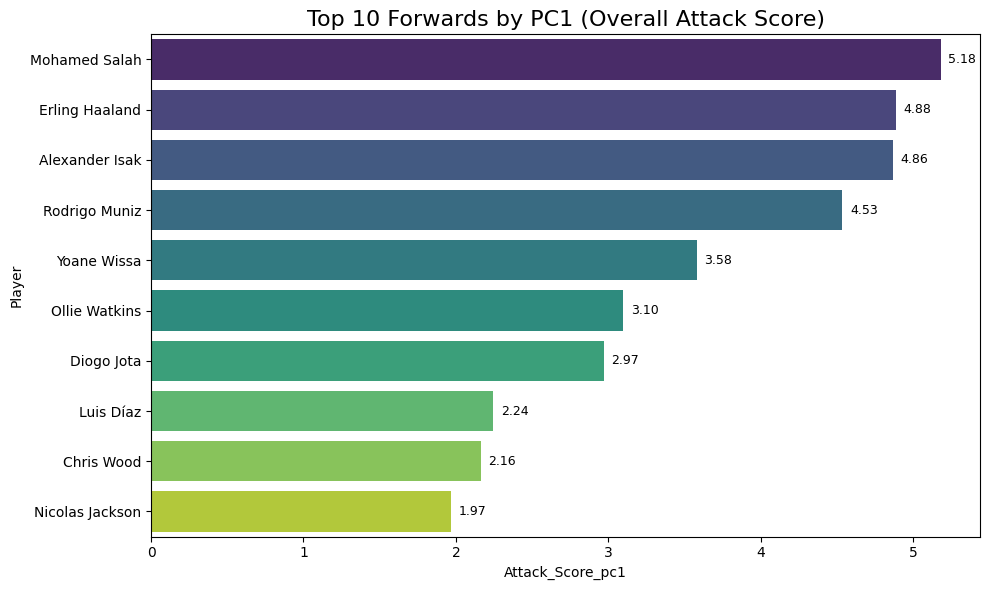

In [379]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top10_attackers, x='Attack_Score_pc1', y='Player', palette='viridis')
plt.title('Top 10 Forwards by PC1 (Overall Attack Score)', fontsize=16)

for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w+0.05, y, f"{w:.2f}", ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.show()

In [380]:
loadings2 = pd.Series(pca.components_[1], index=features)

print("PC2 explained variance ratio:", pca.explained_variance_ratio_[1])
print("PC2 loadings (weights):")
print(loadings2)


PC2 explained variance ratio: 0.29861700124486423
PC2 loadings (weights):
Gls_per90         -0.036780
Ast_per90          0.655885
GplusA_per90       0.332175
NonPenGls_per90   -0.091573
xG_per90          -0.103514
xAG_per90          0.645073
npxG_per90        -0.151337
dtype: float64


* **PC2 can be interpreted as the “Scorer vs Creator axis.”**
* **Players with high PC2 scores = more playmaking-oriented (creators).**
* **layers with low PC2 scores = more goal-oriented finishers (strikers).**

In [381]:
scores = pca.transform(X_scaled)[:,1]   
fw_data['Attack_Score_pc2'] = scores

In [382]:
top10_attackers_ast = fw_data.sort_values('Attack_Score_pc2', ascending=False).head(10)
print(top10_attackers_ast[['Player','Attack_Score_pc2']])

             Player  Attack_Score_pc2
16      Bukayo Saka          4.336929
96    Mohamed Salah          3.967818
60     Jacob Murphy          3.620339
123   Son Heung-min          3.109071
125           Sávio          3.105785
68      Jeremy Doku          2.642325
7    Anthony Elanga          2.187402
2      Adama Traoré          2.080089
75       João Pedro          1.615952
98    Morgan Rogers          1.543722


### **Top 10 Forwards by PC2**

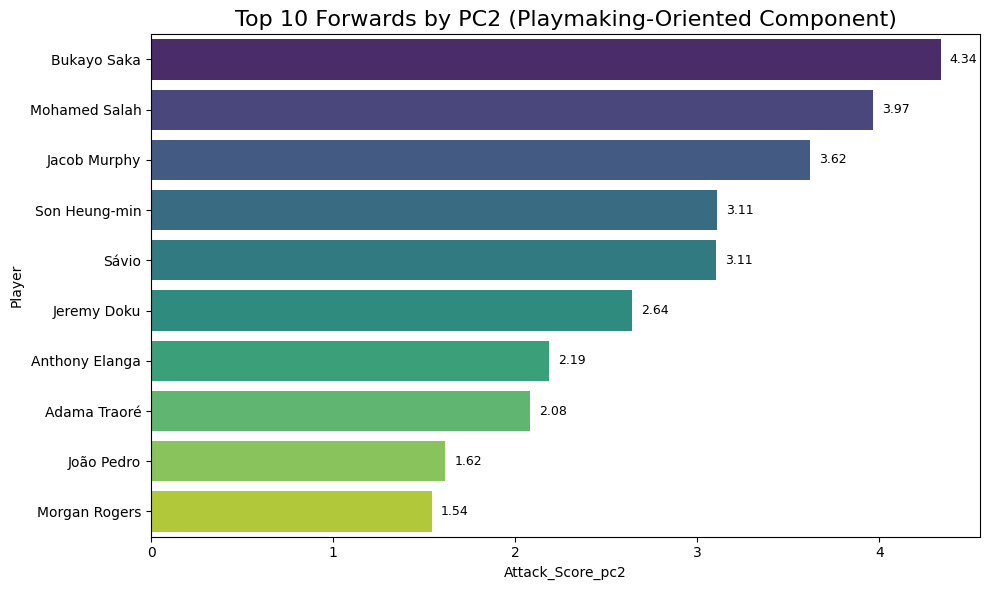

In [383]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top10_attackers_ast, x='Attack_Score_pc2', y='Player', palette='viridis')
plt.title('Top 10 Forwards by PC2 (Playmaking-Oriented Component)', fontsize=16)

for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w+0.05, y, f"{w:.2f}", ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.show()

### **pc1 vs pc2**

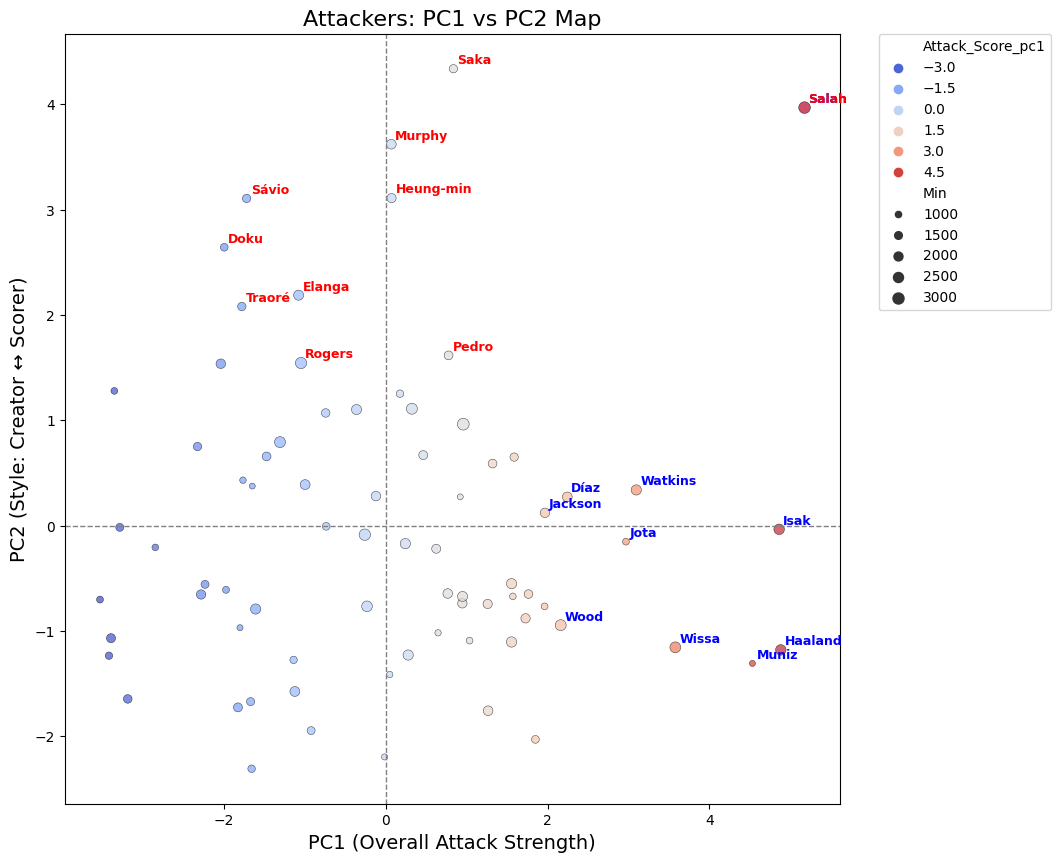

In [384]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=fw_data,
    x="Attack_Score_pc1", 
    y="Attack_Score_pc2",
    size="Min",          
    palette="coolwarm",
    hue = 'Attack_Score_pc1',
    alpha=0.7,
    edgecolor="k"
)

top_players = fw_data.nlargest(10, "Attack_Score_pc1")

for _, row in top_players.iterrows():
    plt.text(
        row["Attack_Score_pc1"]+0.05,    
        row["Attack_Score_pc2"]+0.05,    
        row["Player"].split()[-1],       
        fontsize=9, weight="bold", color="blue"
    )
    
top_players2 = fw_data.nlargest(10, "Attack_Score_pc2")

for _, row in top_players2.iterrows():
    plt.text(
        row["Attack_Score_pc1"]+0.05,    
        row["Attack_Score_pc2"]+0.05,    
        row["Player"].split()[-1],       
        fontsize=9, weight="bold", color="red"
    )
    
plt.axhline(0, color="gray", ls="--", lw=1)
plt.axvline(0, color="gray", ls="--", lw=1)

plt.xlabel("PC1 (Overall Attack Strength)", fontsize=14)
plt.ylabel("PC2 (Style: Creator ↔ Scorer)", fontsize=14)
plt.title("Attackers: PC1 vs PC2 Map", fontsize=16)
plt.legend(
    bbox_to_anchor=(1.05, 1),    
    loc='upper left',           
    borderaxespad=0.
)
plt.show()

* **x-axis (PC1): Overall attacking strength (further right = stronger attacker)**
* **y-axis (PC2): Style dimension (upper = creator, lower = scorer/finisher)**
* **Point size: Playing time (minutes played)**
* **Point color: PC1 score (level of attacking strength)**

In [385]:
w1 = pca.explained_variance_ratio_[0] #pc1 variance ratio
w2 = pca.explained_variance_ratio_[1] #pc2 variance ratio

fw_data['final_Attack_Score'] = (fw_data['Attack_Score_pc1'] * w1 +
                           fw_data['Attack_Score_pc2'] * w2)

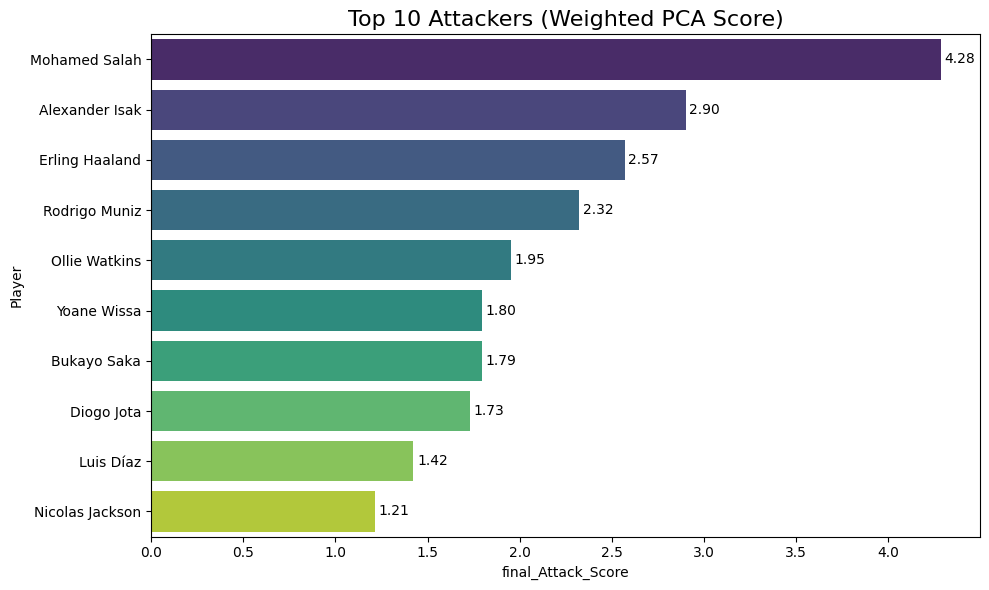

In [386]:
top10 = fw_data.sort_values('final_Attack_Score', ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=top10, x='final_Attack_Score', y='Player', palette='viridis', order=top10['Player'] )
plt.title('Top 10 Attackers (Weighted PCA Score)', fontsize=16)

for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w+0.02, y, f"{w:.2f}", va='center')

plt.tight_layout()
plt.show()

### **🏅The Best Forward is Mohamed Salah in the Premier League.**

**Based on the weighted PCA attack score, Mohamed Salah achieved the highest score among Premier League forwards, making him the best overall attacking player in this analysis.**

------------------
**Thankyou. Please leave your advice in the comments.**